In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [2]:
path = 'Dataset.csv'
df = pd.read_csv(path)
df.head()

,id,comment,label
0,1,Hello mr namal ponnaya 🖕 ponnaya 🖕,YES
1,2,Keri ponnaya🍌🖕,YES
2,3,ane palayan huththo yannaAmmo huththo ukbe art...,YES
3,4,dan balan idapn ranil rata hadawi danatama uge...,YES
4,5,Mr namal ponnaya 😡🤬,YES


In [3]:
##removing unwanted column
df = df.drop(['id'], axis=1)
df.head()

,comment,label
0,Hello mr namal ponnaya 🖕 ponnaya 🖕,YES
1,Keri ponnaya🍌🖕,YES
2,ane palayan huththo yannaAmmo huththo ukbe art...,YES
3,dan balan idapn ranil rata hadawi danatama uge...,YES
4,Mr namal ponnaya 😡🤬,YES


In [4]:
## Exploratory Data Analysis¶

In [5]:
print('found %s datas'% len(df))

found 3265 datas


In [6]:
df['label'].value_counts()

NO     1659
YES    1606
Name: label, dtype: int64

In [7]:
##renaming the columns
df = df.rename(columns={'comment': 'text'})

In [8]:
df.head()

,text,label
0,Hello mr namal ponnaya 🖕 ponnaya 🖕,YES
1,Keri ponnaya🍌🖕,YES
2,ane palayan huththo yannaAmmo huththo ukbe art...,YES
3,dan balan idapn ranil rata hadawi danatama uge...,YES
4,Mr namal ponnaya 😡🤬,YES


In [9]:
##renaming the column values
df['label'] = df['label'].map({'YES': 'Hate Speech', 'NO': 'Non-Hate Speech'})

In [10]:
df.head()

,text,label
0,Hello mr namal ponnaya 🖕 ponnaya 🖕,Hate Speech
1,Keri ponnaya🍌🖕,Hate Speech
2,ane palayan huththo yannaAmmo huththo ukbe art...,Hate Speech
3,dan balan idapn ranil rata hadawi danatama uge...,Hate Speech
4,Mr namal ponnaya 😡🤬,Hate Speech


In [11]:
# Preprocessing

In [12]:
df = df.groupby('label').head(1600)

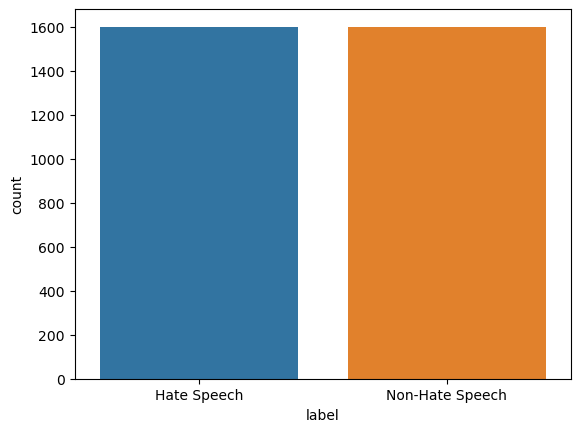

In [13]:
df_label = sns.countplot(x='label', data=df)
df_label.set_xticklabels(df['label'].unique())
plt.show()

In [14]:
df['label'].value_counts()

Hate Speech        1600
Non-Hate Speech    1600
Name: label, dtype: int64

In [15]:
#Feature Extraction using TF-IDF

In [16]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text'])
y = df['label']

In [17]:
#train test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#Build Model
#Naive Bayes

In [20]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)

MultinomialNB()

In [21]:
pred_nb = clf_nb.predict(X_test)

In [22]:
import pickle
with open('my_model.pkl', 'wb') as f:
     pickle.dump(clf_nb, f)

In [23]:
f = open('my_model.pkl', 'rb')  # 'r' for reading; can be omitted
mod = pickle.load(f)

In [24]:
#Evaluation

In [25]:
#Printing of Naive Bayes Report 

In [26]:
print(classification_report(y_test,pred_nb))

                 precision    recall  f1-score   support

    Hate Speech       0.69      0.76      0.73       308
Non-Hate Speech       0.76      0.69      0.72       332

       accuracy                           0.72       640
      macro avg       0.73      0.72      0.72       640
   weighted avg       0.73      0.72      0.72       640



In [27]:
text = ['පලයං හුත්තෝ']
text_features = tfidf.transform (text)
predictions = mod.predict (text_features)
predictions

array(['Hate Speech'], dtype='<U15')